In [1]:
# https://www.openml.org/d/40536
# https://www.openml.org/d/32

import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, validation_curve, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier
import pandas as pd
import matplotlib.pyplot as plt
from experiment import Experiment
import warnings
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

In [2]:
max_iter = [1000, 5000, 10000, 50000, 100000]
C_vals = np.arange(0.001, 2.7, 0.333)
#tol_vals = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
class_weight = [None, 'balanced']
gammas_pipe1 = np.linspace(1.0/(2*120.0), 2.0/120.0, 6)
gammas_pipe2 = np.linspace(1.0/(2*16.0), 2.0/16.0, 6)
kernels = ['linear', 'rbf']

est_params = {
    'svm__max_iter': max_iter,
    'svm__C': C_vals,
    'svm__kernel': kernels,
}

pipe1_params = dict(**est_params, svm__gamma=gammas_pipe1)
pipe2_params = dict(**est_params, svm__gamma=gammas_pipe2)

In [3]:
pipe1 = Pipeline(steps=[('scale', StandardScaler()), 
                       ('svm', SVC())
                      ])
pipe2 = Pipeline(steps=[('scale', StandardScaler()), 
                        ('impute', SimpleImputer()),
                       ('svm', SVC())
                      ])
pen_experiment = Experiment('SVM', 32, 'Pen digits', pipe1, pipe1_params, validationCurveParams=[
    ('svm__max_iter', 'Max Iterations', 'linear'),
    ('svm__C', 'Regularization Parameter', 'linear')
], reshape=False, multiplot_params=('svm__kernel', kernels))

dating_experiment = Experiment('SVM', 40536, 'Speed Dating', pipe2, pipe2_params, validationCurveParams=[
    ('svm__max_iter', 'Max Iterations', 'linear'),
    ('svm__C', 'Regularization Parameter', 'linear')
], reshape=False, multiplot_params=('svm__kernel', kernels))

svm_experiments = {'pen': pen_experiment, 'date': dating_experiment}

SVM on Speed Dating training took 1:34:28.243741
SVM on Speed Dating Test Score: 0.8429594272076373


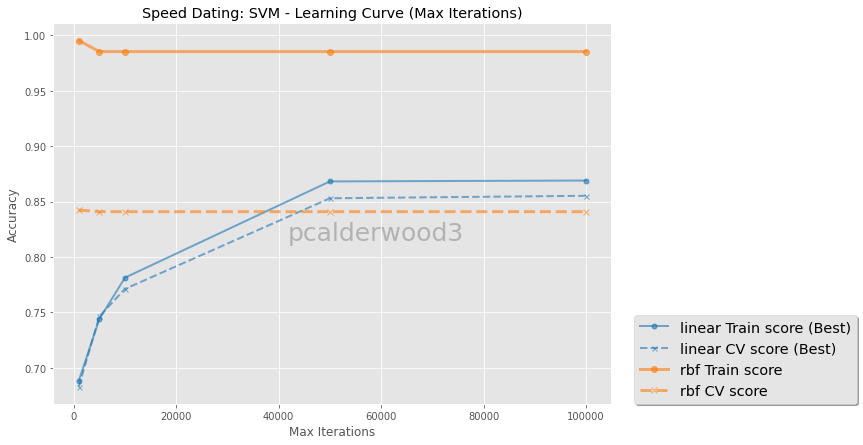

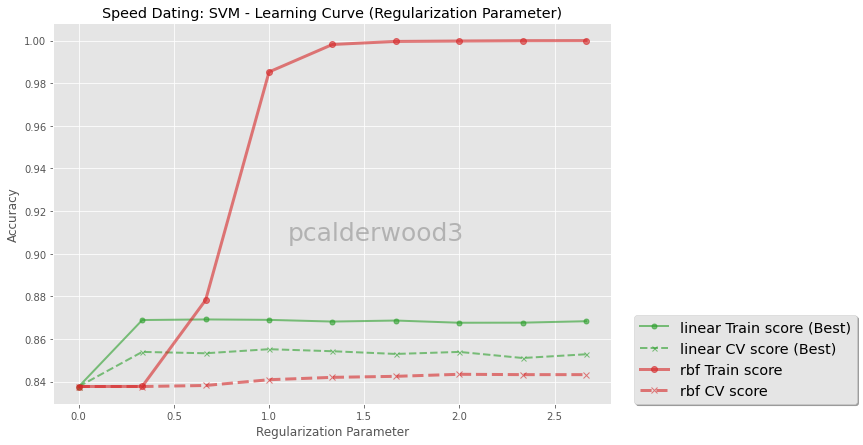

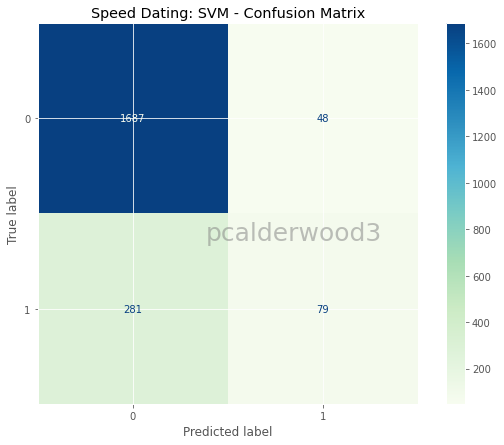

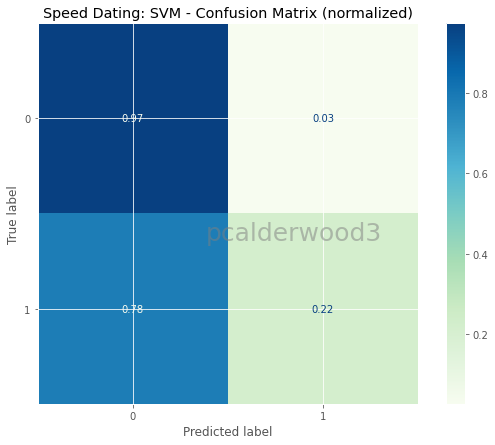

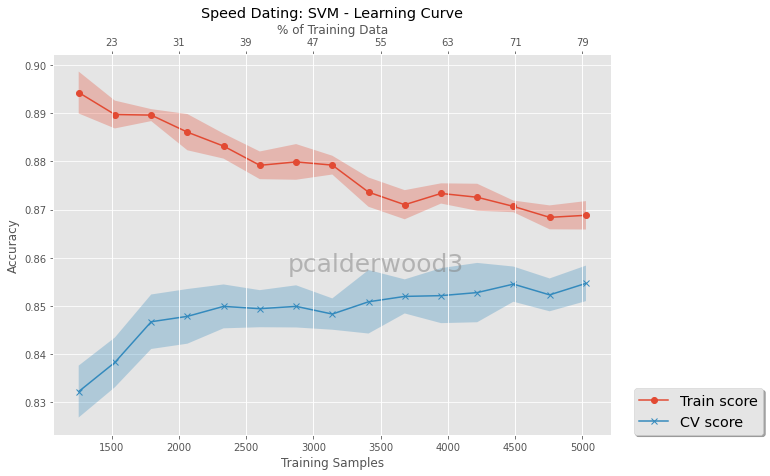

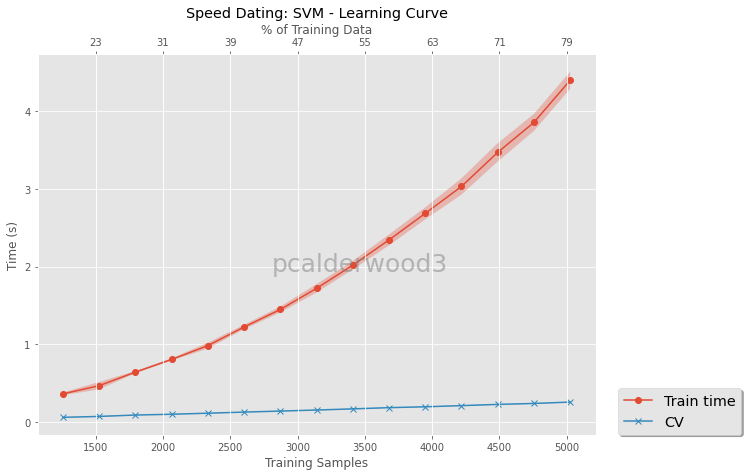

Best parameters took 0:00:06.766774 to train


In [4]:
with warnings.catch_warnings(): # some models are too simple and do not converge to the stop error in time.
    warnings.simplefilter("ignore") 
    dating_experiment.run()
    dating_experiment.plotValidation()
    dating_experiment.plotConfusion()
    dating_experiment.plotLearningCurve()
    dating_experiment.measureFitTime()

In [5]:
print(f'Top 5 params for {dating_experiment.datasetName} using {dating_experiment.leanerName}')
for p in dating_experiment.topParams(5):
    print(p)

Top 5 params for Speed Dating using SVM
(0.8551649615655516, {'svm__C': 1.0, 'svm__gamma': 0.125, 'svm__kernel': 'linear', 'svm__max_iter': 100000})
(0.8551649615655516, {'svm__C': 1.0, 'svm__gamma': 0.05, 'svm__kernel': 'linear', 'svm__max_iter': 100000})
(0.8551649615655516, {'svm__C': 1.0, 'svm__gamma': 0.03125, 'svm__kernel': 'linear', 'svm__max_iter': 100000})
(0.8551649615655516, {'svm__C': 1.0, 'svm__gamma': 0.10625, 'svm__kernel': 'linear', 'svm__max_iter': 100000})
(0.8551649615655516, {'svm__C': 1.0, 'svm__gamma': 0.06875, 'svm__kernel': 'linear', 'svm__max_iter': 100000})


SVM on Pen digits training took 0:03:42.407594
SVM on Pen digits Test Score: 0.99235807860262


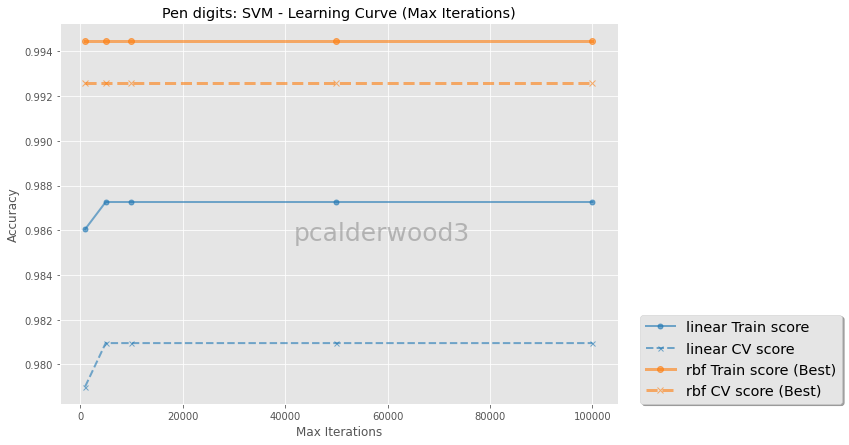

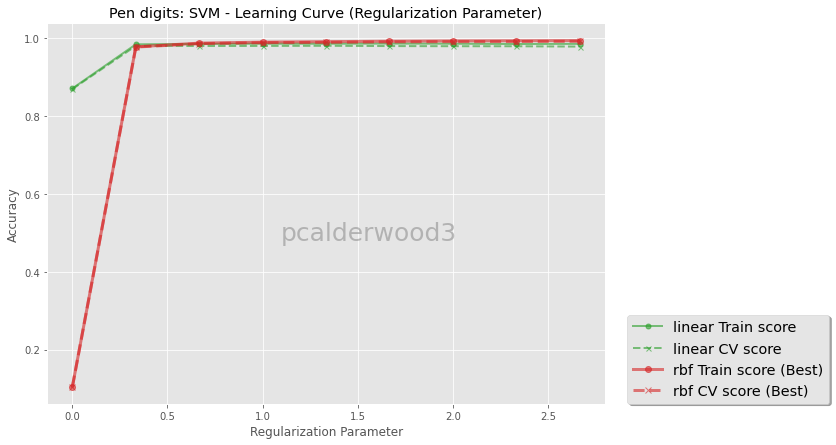

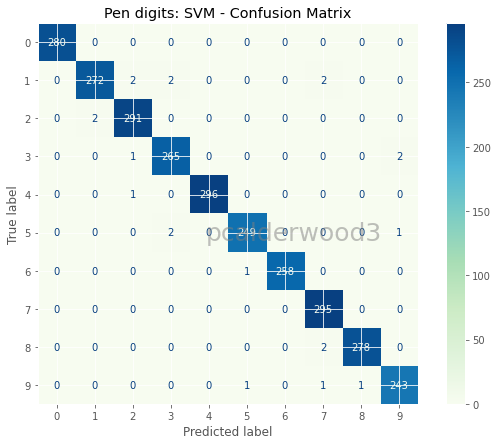

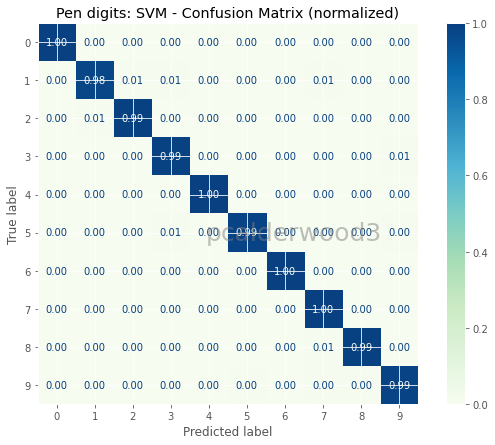

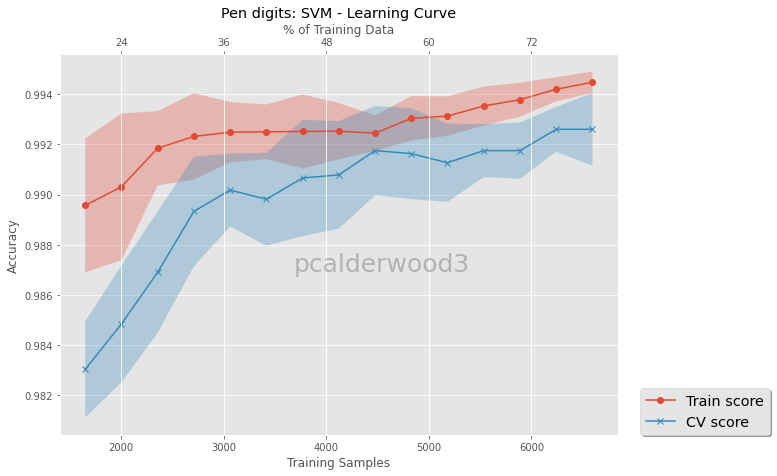

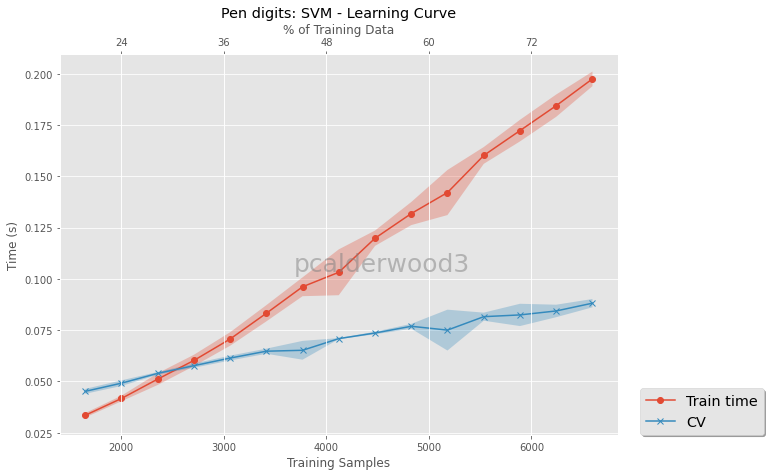

Best parameters took 0:00:00.271825 to train


In [6]:
with warnings.catch_warnings(): # some models are too simple and do not converge to the stop error in time.
    warnings.simplefilter("ignore") 
    pen_experiment.run()
    pen_experiment.plotValidation()
    pen_experiment.plotConfusion()
    pen_experiment.plotLearningCurve()
    pen_experiment.measureFitTime()

In [7]:
print(f'Top 5 params for {pen_experiment.datasetName} using {pen_experiment.leanerName}')
for p in pen_experiment.topParams(5):
    print(p)

Top 5 params for Pen digits using SVM
(0.9926009143523288, {'svm__C': 2.665, 'svm__gamma': 0.016666666666666666, 'svm__kernel': 'rbf', 'svm__max_iter': 100000})
(0.9926009143523288, {'svm__C': 2.665, 'svm__gamma': 0.016666666666666666, 'svm__kernel': 'rbf', 'svm__max_iter': 5000})
(0.9926009143523288, {'svm__C': 2.665, 'svm__gamma': 0.016666666666666666, 'svm__kernel': 'rbf', 'svm__max_iter': 10000})
(0.9926009143523288, {'svm__C': 2.665, 'svm__gamma': 0.016666666666666666, 'svm__kernel': 'rbf', 'svm__max_iter': 1000})
(0.9926009143523288, {'svm__C': 2.665, 'svm__gamma': 0.016666666666666666, 'svm__kernel': 'rbf', 'svm__max_iter': 50000})
